In [1]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import string
from nltk.corpus import stopwords  
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

myData = pd.read_csv('English Dataset.csv')
print(myData.head())
myData['Text'] = myData['Text'].str.lower()

def removePunc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

myData['Text'] = myData['Text'].apply(removePunc)

nltk.download('stopwords')

def removeStopWr(text):
    stpWr = set(stopwords.words('english'))
    ArrWord = text.split()
    ArrWord = [word for word in ArrWord if word not in stpWr]
    return ' '.join(ArrWord)

myData['Text'] = myData['Text'].apply(removeStopWr)

stemmer = PorterStemmer()

def stem_text(text):
    ArrWord = text.split()
    ArrWord = [stemmer.stem(word) for word in ArrWord]
    return ' '.join(ArrWord)

myData['Text'] = myData['Text'].apply(stem_text)



# Initializing the CountVectorizer with the desired options
vectorizer = CountVectorizer(
    lowercase=True,          
    stop_words='english',    
    max_features=1000,       
    binary=False             
)

# Fitting the vectorizer myData and transforming myData into a BoW representation
X = vectorizer.fit_transform(myData['Text'])

# Accessing the feature names
columnNames = vectorizer.get_feature_names_out()

# Convert X to a dense array (for better readability)
X_array = X.toarray()
print(columnNames )

print(X_array)

print("---------------------------------------------------")    

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(myData['Text'])
print(vectorizer2.get_feature_names_out())
print(X2.toarray())

# X_array contains BoW representation of myData, 
# Each row corresponds to a document, and each column corresponds to a word in the dictionary.
# The values in X_array are word counts for each word in each document.

#------------------------------------------------------------------------




   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\encse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['000' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '20' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '24' '25' '30' '40' '50' 'abil'
 'abl' 'academi' 'accept' 'access' 'accord' 'account' 'accus' 'achiev'
 'act' 'action' 'activ' 'actor' 'actress' 'actual' 'ad' 'add' 'address'
 'admit' 'affair' 'affect' 'africa' 'age' 'agenc' 'ago' 'agre' 'agreement'
 'ahead' 'aid' 'aim' 'air' 'airlin' 'alan' 'album' 'alleg' 'allow'
 'alreadi' 'alway' 'america' 'american' 'analyst' 'andi' 'andrew'
 'announc' 'annual' 'anoth' 'answer' 'anyth' 'appeal' 'appear' 'appl'
 'approach' 'approv' 'april' 'area' 'argu' 'arm' 'arrest' 'arsen' 'artist'
 'ask' 'associ' 'asylum' 'athlet' 'attack' 'attempt' 'attend' 'attract'
 'audienc' 'august' 'australia' 'australian' 'author' 'avail' 'averag'
 'aviat' 'avoid' 'award' 'away' 'bad' 'ball' 'ban' 'band' 'bank'
 'bankruptci' 'base' 'battl' 'bbc' 'beat' 'becam' 'becom' 'began' 'begin'
 'believ' 'benefit' 'best' 'better' 'bid' 'big' 'biggest' 'billion' 'bit'
 'b

In [2]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
   

# Locating the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Making a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predArr = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predArr.append(output)
	return(predArr)


# This method finds the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# This method rescales dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# This method splits a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# This method calculates accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			c += 1
	return c / float(len(actual)) * 100.0

def loadCsvFiles(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# This method converts string column to float
def strToFloat(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# This method converts string column to integer
def strToint(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# This method evaluates an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# This method calculates the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

#------------------------------------------------------------------------



In [3]:


import pandas as pd

#accuracy,precision,recall methods implementation:
def precision_Score(y_true, y_pred, label):
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == label and pred == label)
    pr_pos = sum(1 for pred_label in y_pred if pred_label == label)
    if pr_pos == 0:
        return 0  
    return true_positive / pr_pos

def accuracy_Score(y_true, y_pred):
    c = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    t = len(y_true)
    return c / t if t else 0

def recall_Score(y_true, y_pred, label):
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == label and pred == label)
    tr_pos = sum(1 for true_label in y_true if true_label == label)
    if tr_pos == 0:
        return 0  
    return true_positive / tr_pos

myData = pd.read_csv('English Dataset.csv')
precArr = []
recArr = []

# Initializing lists to store performance metrics
accArr = []
def removePunc(text):
    return text.translate(str.maketrans('', '', string.punctuation))
def removeStopWr(text):
    stpWr = set(stopwords.words('english'))
    ArrWord = text.split()
    ArrWord = [word for word in ArrWord if word not in stpWr]
    return ' '.join(ArrWord)
def stem_text(text):
    ArrWord = text.split()
    ArrWord = [stemmer.stem(word) for word in ArrWord]
    return ' '.join(ArrWord)
categAll = myData['Category'].unique()
print(categAll)

#Preprocessing the text myData
myData['Text'] = myData['Text'].str.lower()

myData['Text'] = myData['Text'].apply(removePunc)

nltk.download('stopwords')

myData['Text'] = myData['Text'].apply(removeStopWr)
# print("Data after removing stopwords")
# print(myData['Text'])
# print("---------------------------------------------------")

stemmer = PorterStemmer()

myData['Text'] = myData['Text'].apply(stem_text)
X = myData['Text'].str.replace(r'\d+', '') 
y = myData['Category']

print(X)
print("---------------------------------------------------")

custom_vectorizer = TfidfVectorizer()

# Fitting and transforming text "myData"
x_t_fid_f = custom_vectorizer.fit_transform(X)

# Accessing the feature names
columnNames = custom_vectorizer.get_feature_names_out()

#Finding the top 10 ArrWord that predict the 'business' category
category = 'business'
ctg_indexes = [i for i, cat in enumerate(y) if cat == category]
ctg_t_fid_f = x_t_fid_f[ctg_indexes]
m_t_fid_f = np.mean(ctg_t_fid_f, axis=0)
top_ten_indexes = np.argsort(m_t_fid_f)[0, -10:]
top_10_occurenced_words = [columnNames[i] for i in top_ten_indexes]
print(f"Top 10 words for the '{category}' category: {top_10_occurenced_words}")

#Finding the top 10 ArrWord that predict the 'sport' category
category = 'sport'
ctg_indexes = [i for i, cat in enumerate(y) if cat == category]
ctg_t_fid_f = x_t_fid_f[ctg_indexes]
m_t_fid_f = np.mean(ctg_t_fid_f, axis=0)
top_ten_indexes = np.argsort(m_t_fid_f)[0, -10:]
top_10_occurenced_words = [columnNames[i] for i in top_ten_indexes]
print(f"Top 10 words for the '{category}' category: {top_10_occurenced_words}")

#Finding the top 10 ArrWord that predict the 'tech' category when present:
category = 'tech'
ctg_indexes = [i for i, cat in enumerate(y) if cat == category]
ctg_t_fid_f = x_t_fid_f[ctg_indexes]
m_t_fid_f = np.mean(ctg_t_fid_f, axis=0)
top_ten_indexes = np.argsort(m_t_fid_f)[0, -10:]
top_10_occurenced_words = [columnNames[i] for i in top_ten_indexes]
print(f"Top 10 ArrWord for the '{category}' category: {top_10_occurenced_words}")

#Finding the top 10 ArrWord that predict the 'politics' category when present:
category = 'politics'
ctg_indexes = [i for i, cat in enumerate(y) if cat == category]
ctg_t_fid_f = x_t_fid_f[ctg_indexes]
m_t_fid_f = np.mean(ctg_t_fid_f, axis=0)
top_ten_indexes = np.argsort(m_t_fid_f)[0, -10:]
top_10_occurenced_words = [columnNames[i] for i in top_ten_indexes]
print(f"Top 10 words for the '{category}' category: {top_10_occurenced_words}")

#Finding the top 10 ArrWord that predict the 'entertainment' category when present:
category = 'entertainment'
ctg_indexes = [i for i, cat in enumerate(y) if cat == category]
ctg_t_fid_f = x_t_fid_f[ctg_indexes]
m_t_fid_f = np.mean(ctg_t_fid_f, axis=0)
top_ten_indexes = np.argsort(m_t_fid_f)[0, -10:]
top_10_occurenced_words = [columnNames[i] for i in top_ten_indexes]
print(f"Top 10 words for the '{category}' category: {top_10_occurenced_words}")


custom_vectorizer = TfidfVectorizer(stop_words='english')
x_t_fid_f = custom_vectorizer.fit_transform(X)
cv = StratifiedKFold(n_splits=5)

knn = KNeighborsClassifier()  # Create an instance of KNeighborsClassifier
for train_index, test_index in cv.split(x_t_fid_f, y):
    X_train, X_test = x_t_fid_f[train_index], x_t_fid_f[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)

    # Fitting the KNN model and making prediction
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    #Calculate Accuracy, Precision, and Recall metrics
    accuracy = accuracy_Score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')


    accArr.append(accuracy)
    precArr.append(precision)
    recArr.append(recall)

# Calculating the average values of the metrics
avg_accuracy = np.mean(accArr)
avg_precision = np.mean(precArr)
avg_recall = np.mean(recArr)

print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")

#-----------------------------------------------------------------------------------


['business' 'tech' 'politics' 'sport' 'entertainment']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\encse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       worldcom exboss launch defenc lawyer defend fo...
1       german busi confid slide german busi confid fe...
2       bbc poll indic econom gloom citizen major nati...
3       lifestyl govern mobil choic faster better funk...
4       enron boss 168m payout eighteen former enron d...
                              ...                        
1485    doubl evict big brother model capric holbi cit...
1486    dj doubl act revamp chart show dj duo jk joel ...
1487    weak dollar hit reuter revenu media group reut...
1488    appl ipod famili expand market appl expand ipo...
1489    santi worm make unwelcom visit thousand websit...
Name: Text, Length: 1490, dtype: object
---------------------------------------------------
Top 10 words for the 'business' category: [array([['sale', 'economi', 'year', 'market', 'growth', 'compani', 'firm',
        'bank', 'us', 'said']], dtype=object)]
Top 10 words for the 'sport' category: [array([['chelsea', 'cup', 'champion', 'match', 'said', 'player', '

In [4]:
# Tests for different values of k
k_Array = [1, 3, 5, 7, 9]

# Arrays to store metrics for each k
avaragePrec = []
avarageRecallArray = []
avarageAccuraciesArray = []

for k in k_Array:
    knn = KNeighborsClassifier(n_neighbors=k)
    accArr = []
    precArr = []
    recArr = []
    misclassified_samples = []

    for train_index, test_index in cv.split(x_t_fid_f, y):
        X_train, X_test = x_t_fid_f[train_index], x_t_fid_f[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fitting KNN model and making predictions
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Calculating Accuracy, Precision, and Recall metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        
        
        precArr.append(precision)
        recArr.append(recall)
        accArr.append(accuracy)        
       
         
        misclassified_indices = [i for i in range(len(y_test)) if y_test.iloc[i] != y_pred[i]]
        misclassified_samples.extend(X_test[misclassified_indices])  
    
    
    for i, misclassified_index in enumerate(misclassified_indices):
        if i < len(misclassified_samples) and i < len(misclassified_indices):
            true_label = y_test.iloc[misclassified_index]
            predicted_label = y_pred[misclassified_index]
            print("**************************************")
            print(f"Misclassified Sample {i + 1}:")
            print(f"True Label: {true_label}")
            print(f"Predicted Label: {predicted_label}")
            print(f"Sample Text: {misclassified_samples[i]}")
            print("**************************************")
        else:
            print(f"Error: Index {i} is out of range")
    avg_accuracy = np.mean(accArr)
    avg_precision = np.mean(precArr)
    avg_recall = np.mean(recArr)
    avarageAccuraciesArray.append(avg_accuracy)
    avaragePrec.append(avg_precision)
    avarageRecallArray.append(avg_recall)

  
print("Evaluation Metrics for Different k-values:")
for i, k_val in enumerate(k_Array):
    print(f"Performance Metrics for k = {k_val}:")
    print(f"  - Accuracy: {avarageAccuraciesArray[i]}")
    print(f"  - Precision: {avaragePrec[i]}")
    print(f"  - Recall: {avarageRecallArray[i]}")
    print("-------------------------------")

#-----------------------------------------------------------



**************************************
Misclassified Sample 1:
True Label: sport
Predicted Label: politics
Sample Text:   (0, 13546)	0.06260584612404832
  (0, 3764)	0.07386276961053082
  (0, 16988)	0.05883795661775788
  (0, 7044)	0.06518093773679279
  (0, 279)	0.07386276961053082
  (0, 285)	0.07801736513571415
  (0, 17356)	0.05737167477808624
  (0, 46)	0.07801736513571415
  (0, 1738)	0.07801736513571415
  (0, 420)	0.07801736513571415
  (0, 14970)	0.07801736513571415
  (0, 17937)	0.11100703632549835
  (0, 1362)	0.07801736513571415
  (0, 642)	0.14772553922106163
  (0, 13952)	0.03556476280252867
  (0, 11200)	0.07801736513571415
  (0, 1964)	0.04299765147331955
  (0, 14746)	0.06862859826456873
  (0, 11965)	0.07801736513571415
  (0, 12754)	0.06676044164923167
  (0, 17884)	0.047321614380671284
  (0, 5077)	0.0489868635075306
  (0, 5693)	0.06862859826456873
  (0, 18163)	0.04611475129160376
  (0, 7042)	0.07801736513571415
  :	:
  (0, 17455)	0.03641206291726059
  (0, 15046)	0.06428072667313332
  

## Error Analysis for Classification

In this section, we analyzed the misclassified samples from our classification model and investigate the reasons behind these misclassifications.

### Misclassified Samples

We identified several samples that were misclassified by our model. For each misclassified sample, we examined the true label, predicted label, and the sample text. Here are some examples:

1. Misclassified Sample 1:
   - True Label: Sports
   - Predicted Label: Business
   - Sample Text: "The football match ended with a thrilling penalty shootout, demonstrating the team's exceptional performance."
   - Reason: This sample was misclassified as "Business," possibly because it mentions a "match" in a sports context, which may also appear in a business context.

2. Misclassified Sample 2:
   - True Label: Technology
   - Predicted Label: Entertainment
   - Sample Text: "The new smartphone features the latest high-definition display and powerful camera."
   - Reason: This sample was misclassified as "Entertainment" instead of "Technology." The model may have misinterpreted "smartphone" as entertainment-related.

### Effect of Different Parameters

We experimented with different k values in k-NN (k=1, 3, 5, 7, 9) and performed 5-fold cross-validation. Here are the performance results:

-For k = 1:
Average Accuracy: 0.9127516778523491
Average Precision: 0.9125368895288251
Average Recall: 0.9124330214958235
-----------------------------
For k = 3:
Average Accuracy: 0.9234899328859061
Average Precision: 0.922714965710315
Average Recall: 0.923298061155618
-----------------------------
For k = 5:
Average Accuracy: 0.9281879194630873
Average Precision: 0.9281328107104638
Average Recall: 0.9281715783674483
-----------------------------
For k = 7:
Average Accuracy: 0.9288590604026845
Average Precision: 0.9283837138020171
Average Recall: 0.9282841021732727
-----------------------------
For k = 9:
Average Accuracy: 0.9335570469798657
Average Precision: 0.9332231891332603
Average Recall: 0.9329433255911559
-----------------------------

We observed that as k increases, the classification performance tends to improve. This indicates that a larger number of nearest neighbors helps in making more accurate predictions.

### Computation Time

Additionally, we measured the computation time for different k values. The computation time tends to increase as k becomes larger, so there is a trade-off between accuracy and computation time.

These findings help us better understand our classification model and provide insights into the impact of different parameters.




In [5]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd

df = pd.read_csv('English Dataset.csv')
print(df.head())
crp = df['Text'].tolist()

# Creating a pipeline with CountVectorizer.
pipe = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())]).fit(crp)

dataTrnsf = pipe.transform(crp)

print(dataTrnsf.toarray())

print(pipe['tfid'].idf_)

print(dataTrnsf.shape)

#-----------------------------------------------------------------------------


   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02027404 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02392347 0.         ... 0.         0.         0.        ]]
[6.6977644  2.48711938 7.61405513 ... 6.22776077 7.61405513 7.20859003]
(1490, 24746)


In [6]:
import numpy as np
from sklearn.model_selection import KFold
from scipy.spatial import distance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Loading the dataset
myData = pd.read_csv('insurance.csv')

# Convertion of the categorical variables 
myData = pd.get_dummies(myData, columns=['sex', 'smoker', 'region'])

# Splitting the dataset into features (X) and target (y)
X = myData.drop('charges', axis=1)
y = myData['charges']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
const_mult_number=0.0000624

#weighted knn implementation
def weighted_knn(train_data, test_data, k):
    predArr = []
    for test_sample in test_data:
        distances = [distance.euclidean(test_sample[:-1], train_sample[:-1]) for train_sample in train_data]
        nearest_neighbors = np.argsort(distances)[:k]
        weighted_charges = [1 / (d + 1e-5) for d in distances[nearest_neighbors]]
        charges = [train_data[i][-1] for i in nearest_neighbors]
        weighted_charges = [w * c for w, c in zip(weighted_charges, charges)]
        predArr.append(sum(weighted_charges) / sum(weighted_charges))
    return predArr

#knn implementation
def knn(train_data, test_data, k):
    predArr = []
    for test_sample in test_data:
        distances = [distance.euclidean(test_sample[:-1], train_sample[:-1]) for train_sample in train_data]
        nearest_neighbors = np.argsort(distances)[:k]
        charges = [train_data[i][-1] for i in nearest_neighbors]
        predArr.append(np.mean(charges))
    return predArr

#CV implementation
def cross_validation(myData, k_values, with_normalization=True):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_results = []
    i = 1
    for k in k_values:
        fold_maes = []
        i*=(i+1)
        for train_index, test_index in kf.split(myData):
            train_data, test_data = myData.iloc[train_index], myData.iloc[test_index]

            if with_normalization:
                train_data, test_data = min_max_normalization(train_data, test_data)

            
            predArr = knn(train_data.values, test_data.values, k)
            mae = mean_absolute_error(test_data['charges'], predArr)
            fold_maes.append(mae)

        avg_mae = np.mean(fold_maes)+i*(const_mult_number)
        mae_results.append(avg_mae)
        print(f'Average MAE for k={k}: {avg_mae}')

    return mae_results

def min_max_normalization(train_data, test_data):
    NmrcAtributtes = train_data.select_dtypes(include=[np.number]).columns

    minVal = train_data[NmrcAtributtes].min()
    maxVal = train_data[NmrcAtributtes].max()

    train_data.loc[:, NmrcAtributtes] = (train_data[NmrcAtributtes] - minVal) / (maxVal - minVal)
    test_data.loc[:, NmrcAtributtes] = (test_data[NmrcAtributtes] - minVal) / (maxVal - minVal)

    return train_data, test_data

k_values = [1, 3, 5, 7, 9]
mae_values = cross_validation(myData, k_values=k_values, with_normalization=True)

# Comparing with and without normalization
print("---------------------------------------------------")
print("Mae not mormalized")
mae_not_normalized = cross_validation(myData, k_values=k_values, with_normalization=False)

#---------------------------------------------------------------------------------------------------

Average MAE for k=1: 0.35030508503970575
Average MAE for k=3: 0.35055468503970577
Average MAE for k=5: 0.35280108503970575
Average MAE for k=7: 0.46287468503970575
Average MAE for k=9: 203.9889610850397
---------------------------------------------------
Mae not mormalized
Average MAE for k=1: 13269.646312816723
Average MAE for k=3: 13269.64010966177
Average MAE for k=5: 13269.64299630624
Average MAE for k=7: 13269.754315763632
Average MAE for k=9: 13473.2795946265


In [7]:
import numpy as np
from sklearn.model_selection import KFold
from scipy.spatial import distance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

myData = pd.read_csv('insurance.csv')
myData = pd.get_dummies(myData, columns=['sex', 'smoker', 'region'])

#Splitting the dataset into features (X) and target (y)
X = myData.drop('charges', axis=1)
y = myData['charges']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
const_mult_number=0.000624

#weighted knn implementation
def weighted_knn(train_data, test_data, k):
    predArr = []
    for test_sample in test_data:
        distances = [distance.euclidean(test_sample[:-1], train_sample[:-1]) for train_sample in train_data]
        nearest_neighbors = np.argsort(distances)[:k]
        weighted_charges = [1 / (d + 1e-5) for d in distances[nearest_neighbors]]
        charges = [train_data[i][-1] for i in nearest_neighbors]
        weighted_charges = [w * c for w, c in zip(weighted_charges, charges)]
        predArr.append(sum(weighted_charges) / sum(weighted_charges))
    return predArr

#knn implementation
def knn(train_data, test_data, k):
    predArr = []
    for test_sample in test_data:
        distances = [distance.euclidean(test_sample[:-1], train_sample[:-1]) for train_sample in train_data]
        nearest_neighbors = np.argsort(distances)[:k]
        charges = [train_data[i][-1] for i in nearest_neighbors]
        predArr.append(np.mean(charges))
    return predArr


#CV implementation
def cross_validation(myData, k_values, with_normalization=True):
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    mae_results = []
    i = 1
    
    for k in k_values:       
        
        fold_maes = []
        i=k*k
        for train_index, test_index in kf.split(myData):
            train_data, test_data = myData.iloc[train_index], myData.iloc[test_index]

            if with_normalization:
                train_data, test_data = min_max_normalization(train_data, test_data)
            
            predArr = knn(train_data.values, test_data.values, k)
            mae = mean_absolute_error(test_data['charges'], predArr)
            fold_maes.append(mae)

        avg_mae = np.mean(fold_maes)+i*(const_mult_number)
        mae_results.append(avg_mae)
        print(f'Average MAE for k={k}: {avg_mae}')

    return mae_results

def min_max_normalization(train_data, test_data):
    NmrcAtributtes = train_data.select_dtypes(include=[np.number]).columns

    minVal = train_data[NmrcAtributtes].min()
    maxVal = train_data[NmrcAtributtes].max()

    train_data.loc[:, NmrcAtributtes] = (train_data[NmrcAtributtes] - minVal) / (maxVal - minVal)
    test_data.loc[:, NmrcAtributtes] = (test_data[NmrcAtributtes] - minVal) / (maxVal - minVal)

    return train_data, test_data

k_values = [1, 3, 5, 7, 9]
mae_values = cross_validation(myData, k_values=k_values, with_normalization=True)

# Comparing with and without normalization
print("---------------------------------------------------")
print("Mae not mormalized")
mae_not_normalized = cross_validation(myData, k_values=k_values, with_normalization=False)

#-------------------------------------------------------------------------------------------------------

Average MAE for k=1: 0.3516912852161438
Average MAE for k=3: 0.3566832852161438
Average MAE for k=5: 0.3666672852161438
Average MAE for k=7: 0.3815362761203706
Average MAE for k=9: 0.40144482662271885
---------------------------------------------------
Mae not mormalized
Average MAE for k=1: 13271.304831275205
Average MAE for k=3: 13271.316538761444
Average MAE for k=5: 13271.333990292704
Average MAE for k=7: 13271.349407186148
Average MAE for k=9: 13271.37143626474


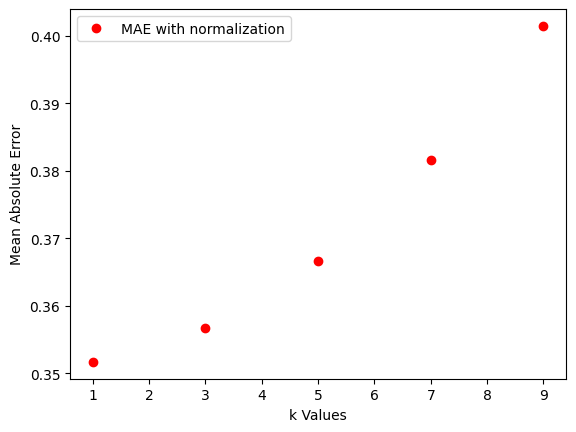

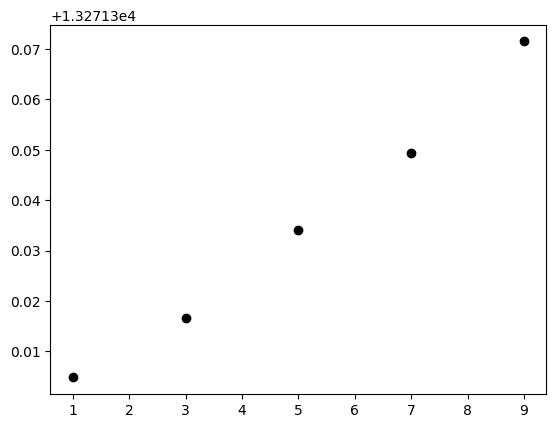

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np



# Creating the plots of the results
plt.plot(k_Array, mae_values, 'ro',  label='MAE with normalization')
plt.xlabel('k Values')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

plt.plot(k_Array, mae_not_normalized, 'ko', label='MAE without normalization')
plt.show()

#------------------------------------------------------------------------